In [1]:
# Recurrent Neural Network

# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
# Importing the training set
training_set = pd.read_csv('Google_Stock_Price_Train.csv')
training_set.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [6]:
training_set = training_set.iloc[:,1:2].values

In [7]:
training_set

array([[ 325.25],
       [ 331.27],
       [ 329.83],
       ..., 
       [ 793.7 ],
       [ 783.33],
       [ 782.75]])

In [8]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)

In [11]:
training_set

array([[ 0.08581368],
       [ 0.09701243],
       [ 0.09433366],
       ..., 
       [ 0.95725128],
       [ 0.93796041],
       [ 0.93688146]])

In [12]:
training_set.shape

(1258, 1)

In [13]:
# Getting the inputs and the ouputs
X_train = training_set[0:1257]
y_train = training_set[1:1258]

In [16]:
# Reshaping
X_train = np.reshape(X_train, (1257, 1, 1))

In [17]:
X_train

array([[[ 0.08581368]],

       [[ 0.09701243]],

       [[ 0.09433366]],

       ..., 
       [[ 0.95163331]],

       [[ 0.95725128]],

       [[ 0.93796041]]])

In [18]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.


In [19]:
# Initialising the RNN
regressor = Sequential()

In [20]:
# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

In [21]:
# Adding the output layer
regressor.add(Dense(units = 1))

In [22]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [23]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 32, epochs = 200)

Epoch 1/200
1257/1257 [==============================] - 2s - loss: 0.4097     
Epoch 2/200
1257/1257 [==============================] - 0s - loss: 0.3068     
Epoch 3/200
1257/1257 [==============================] - 0s - loss: 0.2292     
Epoch 4/200
1257/1257 [==============================] - 0s - loss: 0.1723     
Epoch 5/200
1257/1257 [==============================] - 0s - loss: 0.1326     
Epoch 6/200
1257/1257 [==============================] - 0s - loss: 0.1055     
Epoch 7/200
1257/1257 [==============================] - 0s - loss: 0.0880     
Epoch 8/200
1257/1257 [==============================] - 0s - loss: 0.0773     
Epoch 9/200
1257/1257 [==============================] - 0s - loss: 0.0708     
Epoch 10/200
1257/1257 [==============================] - 0s - loss: 0.0672     
Epoch 11/200
1257/1257 [==============================] - 0s - loss: 0.0651     
Epoch 12/200
1257/1257 [==============================] - 0s - loss: 0.0637     
Epoch 13/200
1257/1257 [=============

In [24]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
test_set = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = test_set.iloc[:,1:2].values

In [25]:
real_stock_price.shape

(20, 1)

In [26]:
# Getting the predicted stock price of 2017
inputs = real_stock_price
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (20, 1, 1))
predicted_stock_price = regressor.predict(inputs)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

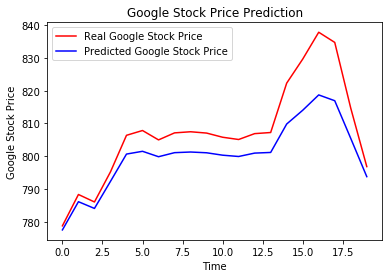

In [27]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [28]:
# Part 4 - Evaluating the RNN

import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))

In [29]:
rmse

8.74831130894829